<a href="https://colab.research.google.com/github/bhalla-18/Google-C-Impact/blob/main/Google_Causal_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries, Directories and Data

In [ ]:
%cd /content/drive/MyDrive/BUSINESS_ANALYST/Business Analyst course/Econometrics and Causal Inference/Google Causal Impact

/content/drive/MyDrive/BUSINESS_ANALYST/Business Analyst course/Econometrics and Causal Inference/Google Causal Impact


In [ ]:
# Install Libraries
!pip install yfinance
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Libraries
import yfinance as yf
from causalimpact import CausalImpact
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Define Dates
training_start = "2020-09-01"
training_end = "2020-10-19"
treatment_start = "2020-10-20"
treatment_end = "2020-10-23"
end_stock = "2020-10-24"

# Loading Financial Data

In [ ]:
# Bitcoin Data
BitC = ['BTC-USD']
y = yf.download(tickers=BitC, 
                start = training_start, 
                end = end_stock,
                interval = '1d')
y = y['Adj Close'].rename('y')
y.head(2)

[*********************100%***********************]  1 of 1 completed


Date
2020-09-01    11970.478516
2020-09-02    11414.034180
Name: y, dtype: float64

In [ ]:
# Load more stock data (of control groups)
stocks = ["CARL-B.CO", "ZAL.DE", "SQ", "CRSP", "TRMB", "JD", "DE", "KTOS", "GOOG"]
X = yf.download(tickers = stocks, 
                start = training_start, 
                end = end_stock,
                interval = "1d")
X.head(3)


[*********************100%***********************]  9 of 9 completed


Adj Close                                                 \
             CARL-B.CO       CRSP          DE         GOOG         JD   
Date                                                                    
2020-09-01  816.406311  93.419998  213.404510  1660.709961  80.459969   
2020-09-02  824.950073  93.930000  212.835953  1728.280029  81.162254   
2020-09-03  840.708557  85.690002  206.659958  1641.839966  77.094872   

                                                              Close  ...  \
                 KTOS          SQ       TRMB     ZAL.DE   CARL-B.CO  ...   
Date                                                                 ...   
2020-09-01  19.700001  166.660004  53.410000  77.000000  860.000000  ...   
2020-09-02  19.910000  162.880005  54.310001  77.000000  869.000000  ...   
2020-09-03  19.520000  152.860001  50.900002  75.080002  885.599976  ...   

                 Open    Volume                                               \
               ZAL.DE CARL-B.CO       CRSP         DE       GOOG          JD   
Date                                                                           
2020-09-01  74.959999    269532   779500.0  1873400.0  1825300.0  11431400.0   
2020-09-02  77.500000    202539   532000.0  1983000.0  2511200.0  13860900.0   
2020-09-03  77.260002    248867  1278900.0  1975200.0  3107800.0  19254000.0   

                                                     
                KTOS          SQ       TRMB  ZAL.DE  
Date                                                 
2020-09-01  587600.0  12306400.0   542300.0  790198  
2020-09-02  612800.0  11214800.0   728800.0  496554  
2020-09-03  847100.0  16421200.0  1220300.0  736259  

[3 rows x 54 columns]

In [ ]:
# Getting just the adjusted close 
X = X.iloc[:,:len(stocks)]
X.head(2)

Adj Close                                                 \
             CARL-B.CO       CRSP          DE         GOOG         JD   
Date                                                                    
2020-09-01  816.406311  93.419998  213.404510  1660.709961  80.459969   
2020-09-02  824.950073  93.930000  212.835953  1728.280029  81.162254   

                                                     
                 KTOS          SQ       TRMB ZAL.DE  
Date                                                 
2020-09-01  19.700001  166.660004  53.410000   77.0  
2020-09-02  19.910000  162.880005  54.310001   77.0

In [ ]:
# Removing unneded level
X.columns = X.columns.droplevel()
X.head(1)

,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,
2020-09-01,816.406311,93.419998,213.40451,1660.709961,80.459969,19.700001,166.660004,53.41,77.0


In [ ]:
# Combine everything
df = pd.concat([y,X], axis = 1)
df.head(2)

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-09-01,11970.478516,816.406311,93.419998,213.404510,1660.709961,80.459969,19.700001,166.660004,53.410000,77.0
2020-09-02,11414.034180,824.950073,93.930000,212.835953,1728.280029,81.162254,19.910000,162.880005,54.310001,77.0


# Data Analysis

In [ ]:
# Prepare Dataframe with only Training Data
df_training = df[df.index <= training_end]
df_training.tail()

,y,CARL-B.CO,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB,ZAL.DE
Date,,,,,,,,,,
2020-10-15,11495.349609,830.835754,99.889999,234.352615,1559.130005,78.275093,21.100000,188.600006,52.290001,84.419998
2020-10-16,11322.123047,823.810852,109.830002,236.142914,1573.010010,79.513840,20.790001,186.350006,52.340000,84.800003
2020-10-17,11358.101562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-18,11483.359375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-19,11742.037109,826.658813,107.720001,234.283737,1534.609985,78.626236,20.639999,186.960007,51.970001,85.000000


In [ ]:
 # Stationarity 
 # Dicky-Fuller test
 # if p < 0.05 data is stationary
from statsmodels.tsa.stattools import adfuller
p= adfuller(x = df_training.y)[1]
print(p)

0.11720457525853123


In [ ]:
#ifelse to check stationarity
print(p)
if p < 0.05:
  print("The time series is staionary")
else:
  print("The time series is not stationary")


0.11720457525853123
The time series is not stationary


In [ ]:
# Differencing 
differencing = df_training.pct_change().dropna()


In [ ]:
# Adfuller on differenced data
p = adfuller(x = differencing.y)[1]
print(p)

#ifelse check

if p < 0.05:
  print("The time series is stationary")
else:
  print("The time series is not stationary")

0.010954940873219904
The time series is stationary


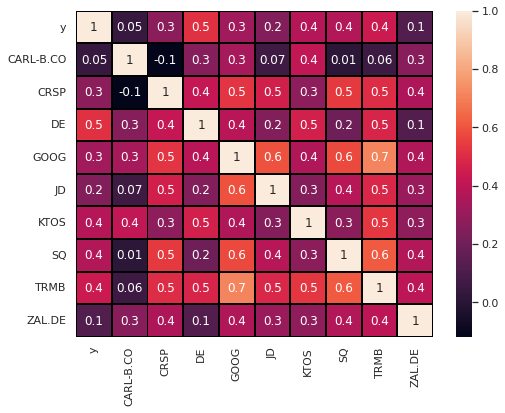

In [ ]:
# Correlation matrix 
plt.figure(figsize=(8,6))
sns.set(font_scale= 1)
sns.heatmap(differencing.corr(), 
            annot = True,
            fmt = '.1g',
            linewidths = 1,
            linecolor = 'black')

# Google Causal Impact

In [ ]:
#Prepare the dataset
df_final = df.drop(columns = ["CARL-B.CO", "ZAL.DE"])
df_final.head(1)

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,213.40451,1660.709961,80.459969,19.700001,166.660004,53.41


In [ ]:
# Prepare pre and post period 
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]

In [ ]:
df_final.dropna()

,y,CRSP,DE,GOOG,JD,KTOS,SQ,TRMB
Date,,,,,,,,
2020-09-01,11970.478516,93.419998,213.404510,1660.709961,80.459969,19.700001,166.660004,53.410000
2020-09-02,11414.034180,93.930000,212.835953,1728.280029,81.162254,19.910000,162.880005,54.310001
2020-09-03,10245.296875,85.690002,206.659958,1641.839966,77.094872,19.520000,152.860001,50.900002
2020-09-04,10511.813477,82.019997,207.179520,1591.040039,78.031250,19.260000,146.389999,49.959999
2020-09-08,10131.516602,81.459999,206.101196,1532.390015,74.344276,19.230000,139.110001,49.139999
2020-09-09,10242.347656,85.250000,211.277237,1556.959961,75.290405,19.549999,144.210007,50.110001
2020-09-10,10363.138672,81.800003,210.875336,1532.020020,72.695862,19.469999,141.070007,49.160000
2020-09-11,10400.915039,79.980003,211.708557,1520.719971,72.354477,19.639999,137.449997,50.160000
2020-09-14,10680.837891,84.709999,214.031921,1519.280029,74.705162,20.680000,144.399994,50.430000


Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
Do not call `graph_parents`.
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.
Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


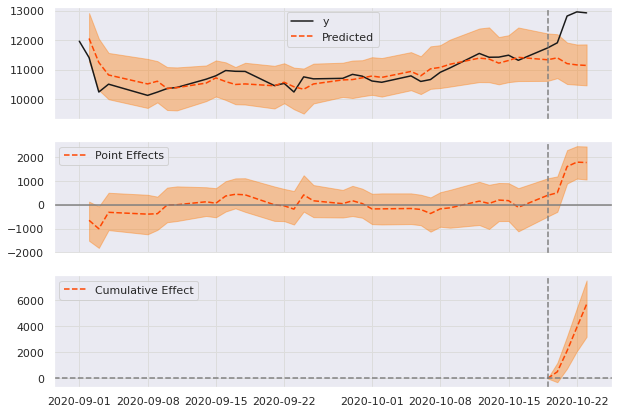

In [ ]:
# Google Casual Impact
impact = CausalImpact(data = df_final.dropna(),
                      pre_period = pre_period,
                      post_period = post_period)
impact.plot()

In [ ]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    12659.36           50637.45
Prediction (s.d.)         11232.44 (282.5)   44929.75 (1130.02)
95% CI                    [10771.56, 11878.96][43086.24, 47515.83]

Absolute effect (s.d.)    1426.93 (282.5)    5707.7 (1130.02)
95% CI                    [780.41, 1887.8]   [3121.62, 7551.21]

Relative effect (s.d.)    12.7% (2.52%)      12.7% (2.52%)
95% CI                    [6.95%, 16.81%]    [6.95%, 16.81%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 12659.36. By contrast, in the absence of an
intervention, we would have expected an average response of 11232.44.
The 95% interval of this counterfactual prediction is [10771.56, 11878.96].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 1426.93 with a 95% interval of
[780.41, 1887.8]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 50637.45.
By contrast, had the intervention not taken place, we would have expected
a sum of 44929.75. The 95% interval of this prediction is [43086.24, 47515.83].


The above results are given in terms of absolute numbers. In relative
te